In [1]:
pip install WordCloud

In [2]:
#utilities
import re
import numpy as np
import pandas as pd
#plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nltk
from nltk.stem import WordNetLemmatizer
#sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
#importing the Dataset
DATASET_COLUMNS=['target','ids','data','flag','user','text']
DATASET_ENCODING="ISO-8859-1"
df=pd.read_csv('/content/sample_data/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
df.sample(5)

,target,ids,data,flag,user,text
1303202,4,2009038836,Tue Jun 02 15:03:10 PDT 2009,NO_QUERY,MariPeneh,@TDUBDAHOTBOY thank you
647753,0,2236847701,Fri Jun 19 04:40:05 PDT 2009,NO_QUERY,JuneMalik,came down the stairs too fast and missed a ste...
748942,0,2284741209,Mon Jun 22 14:15:28 PDT 2009,NO_QUERY,TomRavesloot,@minicooper321 it does all the time if you ask...
677212,0,2248619197,Fri Jun 19 20:54:49 PDT 2009,NO_QUERY,kattastrophex3,bored as hell and all alone at my house during...
544656,0,2201177220,Tue Jun 16 19:54:50 PDT 2009,NO_QUERY,mellooody,"time for bed, teeth are killing me stupid bra..."


In [11]:
df.head()

,target,ids,data,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
df.columns

Index(['target', 'ids', 'data', 'flag', 'user', 'text'], dtype='object')

In [13]:
print("Length of my data=",len(df))

Length of my data= 1600000


In [14]:
df.shape

(1600000, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   data    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [16]:
df.dtypes

,0
target,int64
ids,int64
data,object
flag,object
user,object
text,object


In [17]:
np.sum(df.isnull().any(axis=1))

0

In [18]:
print('count of columns in the data is: ',len(df.columns))
print('count of rows in the data is: ',len(df))

count of columns in the data is:  6
count of rows in the data is:  1600000


In [19]:
df['target'].unique()

array([0, 4])

In [20]:
df['target'].nunique()

2

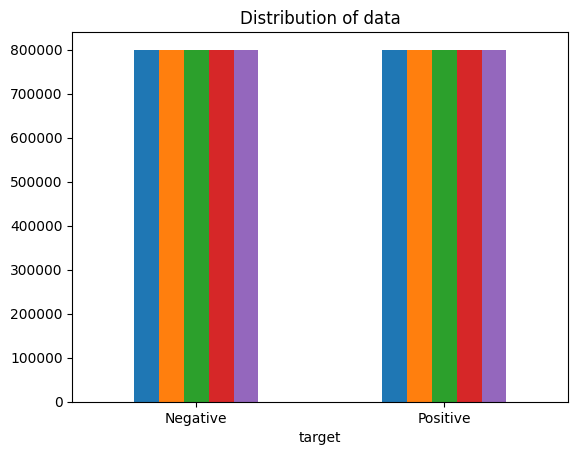

In [21]:
#plotting the distribution for dataset
ax = df.groupby('target').count().plot(kind='bar',title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'],rotation=0)
#storing data in lists
text,sentiment=list(df['text']),list(df['target'])

<Axes: xlabel='target', ylabel='count'>

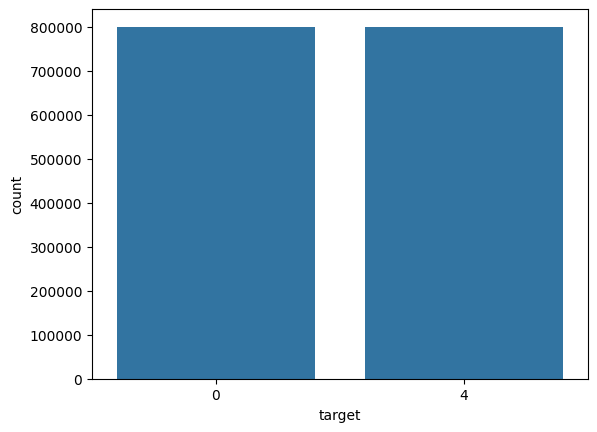

In [22]:
import seaborn as sns
sns.countplot(x='target',data=df)

In [23]:
data=df[['text','target']]

In [24]:
data['target'].unique()

array([0, 4])

In [25]:
data_pos=data[data['target']==1]
data_neg=data[data['target']==0]

In [26]:
data_pos=data_pos.iloc[:int(20000)]
data_neg=data_neg.iloc[:int(20000)]

In [27]:
dataset=pd.concat([data_pos,data_neg])

In [28]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

,text
19995,"not much time off this weekend, work trip to m..."
19996,one more day of holidays
19997,feeling so down right now .. i hate you damn h...
19998,"geez,i hv to read the whole book of personalit..."
19999,i threw my sign at donnie and he bent over to ...


In [29]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
    'and', 'any','are', 'as', 'at', 'be', 'because', 'been', 'before',
    'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
    'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
    'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
    'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
    'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
    'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
    'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
    't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
    'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
    'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
    'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
    'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
    "youve", 'your', 'yours', 'yourself', 'yourselves']

In [30]:
STOPWORDS=set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text']=dataset['text'].apply(lambda text:cleaning_stopwords(text))
dataset['text'].head()

,text
0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,upset can't update facebook texting it... migh...
2,@kenichan dived many times ball. managed save ...
3,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving all. i'..."


In [31]:
import string
english_punctuations=string.punctuation
punctuations_list=english_punctuations
def cleaning_punctuations(text):
    translator=str.maketrans('','',punctuations_list)
    return text.translate(translator)
dataset['text']=dataset['text'].apply(lambda x:cleaning_punctuations(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


In [32]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+',r'1',text)
dataset['text']=dataset['text'].apply(lambda x:cleaning_repeating_char(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


In [33]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text']=dataset['text'].apply(lambda x:cleaning_URLs(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


In [34]:
def cleaning_numbers(data):
    return re.sub('[0-9]+',' ',data)
dataset['text']=dataset['text'].apply(lambda x:cleaning_numbers(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


In [35]:
from nltk.tokenize import RegexpTokenizer

In [38]:
# Convert all elements in the 'text' column to strings.
dataset['text'] = dataset['text'].astype(str)

tokenizer=RegexpTokenizer(r'\w+')

# Now apply the tokenizer
dataset['text']=dataset['text'].apply(tokenizer.tokenize)

dataset['text'].head()

,text
0,"[switchfoot, httptwitpiccom, zl, a, s, bummer,..."
1,"[upset, cant, update, facebook, texting, it, m..."
2,"[kenichan, dived, many, times, ball, managed, ..."
3,"[whole, body, feels, itchy, like, fire]"
4,"[nationwideclass, no, its, not, behaving, all,..."


In [40]:
import nltk
st = nltk.PorterStemmer() # Changed nltk.PortStemmer() to nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
0,"[switchfoot, httptwitpiccom, zl, a, s, bummer,..."
1,"[upset, cant, update, facebook, texting, it, m..."
2,"[kenichan, dived, many, times, ball, managed, ..."
3,"[whole, body, feels, itchy, like, fire]"
4,"[nationwideclass, no, its, not, behaving, all,..."


In [42]:
import nltk

# Download the WordNet resource
nltk.download('wordnet')

lm=nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text=[lm.lemmatize(word) for word in data]
    return data

dataset['text']=dataset['text'].apply(lambda x:lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
0,"[switchfoot, httptwitpiccom, zl, a, s, bummer,..."
1,"[upset, cant, update, facebook, texting, it, m..."
2,"[kenichan, dived, many, times, ball, managed, ..."
3,"[whole, body, feels, itchy, like, fire]"
4,"[nationwideclass, no, its, not, behaving, all,..."


In [43]:
X=data.text
y=data.target

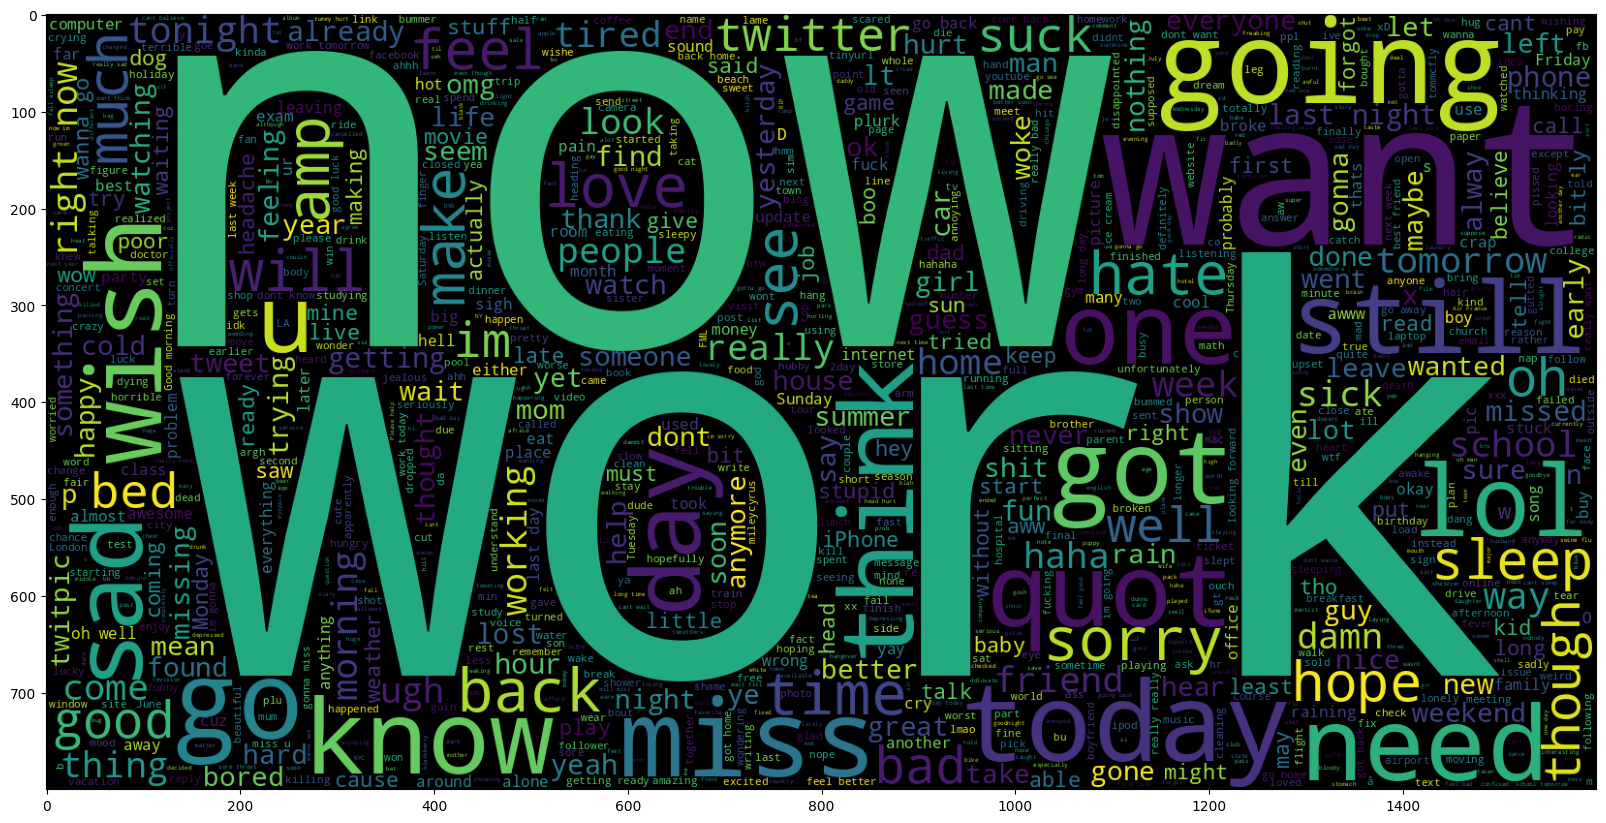

In [46]:
!pip install wordcloud --upgrade

import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data_neg = data['text'][:800000].tolist() # convert the Series object to a list
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(" ".join(data_neg))
plt.imshow(wc)

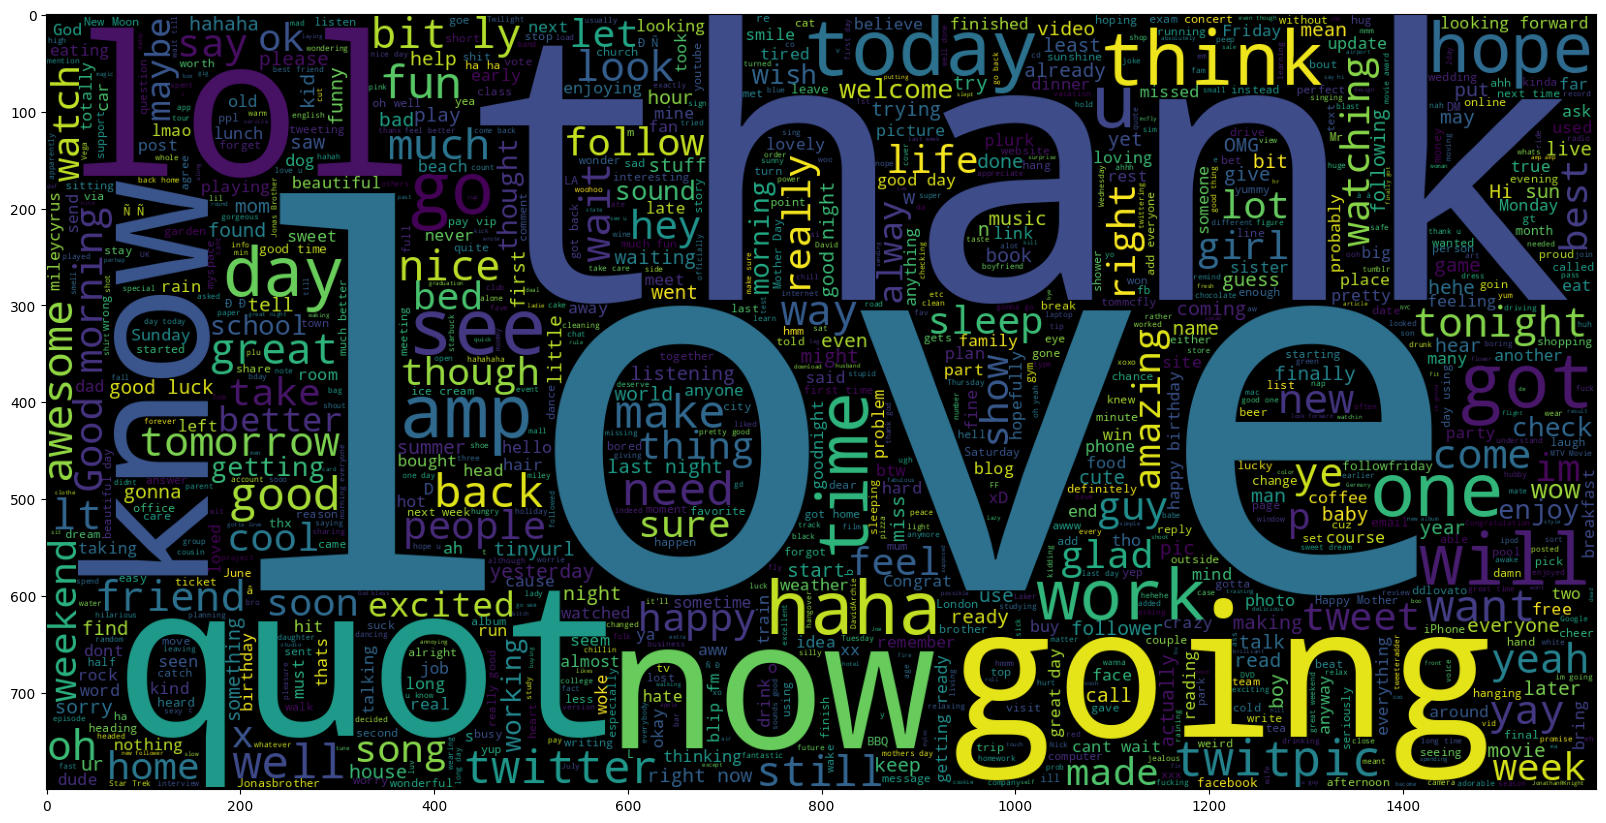

In [47]:
data_pos = data['text'][800000:].tolist() # convert the Series object to a list
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(" ".join(data_pos))
plt.imshow(wc)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=26105111)

In [50]:
!pip install scikit-learn # make sure scikit-learn is installed
from sklearn.feature_extraction.text import TfidfVectorizer # import the correct class from scikit-learn

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=26105111)

vectoriser = TfidfVectorizer(ngram_range=(1,2),max_features=500000) # correct the class name
vectoriser.fit(X_train)
print('No. of feature_words: ',len(vectoriser.get_feature_names_out())) # use the updated method name to get feature names

No. of feature_words:  500000


In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def model_Evaluate(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Define labels and categories
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    # Calculate percentages for the confusion matrix
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    # Set labels and title for the plot
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

    # Show plot
    plt.show()


              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           4       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



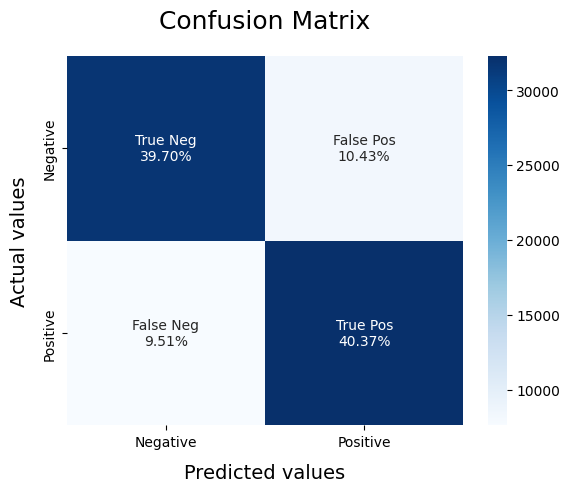

array([4, 4, 4, ..., 4, 0, 0])

In [71]:
BNB_model=BernoulliNB(alpha=2)
BNB_model.fit(vectoriser.transform(X_train),y_train)
model_Evaluate(BNB_model,vectoriser.transform(X_test),y_test)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           4       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



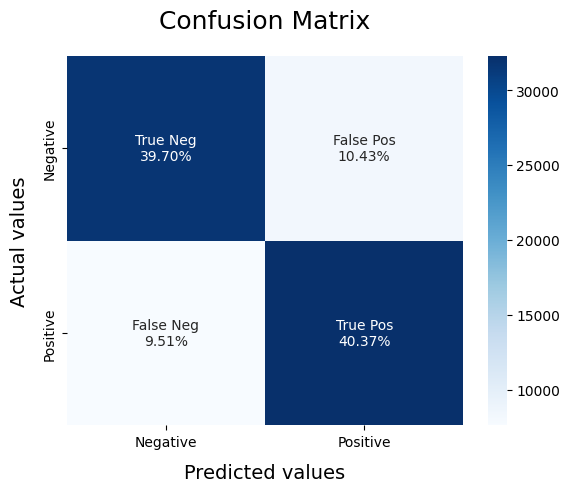

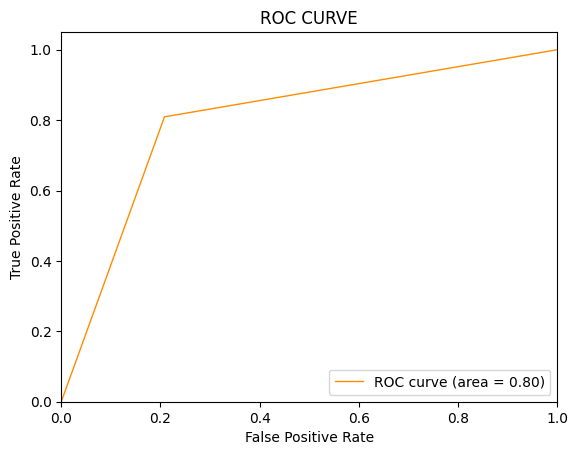

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def model_Evaluate(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Define labels and categories
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    # Calculate percentages for the confusion matrix
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    # Set labels and title for the plot
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

    # Show plot
    plt.show()

    return y_pred # return y_pred

BNB_model=BernoulliNB(alpha=2)
BNB_model.fit(vectoriser.transform(X_train),y_train)
y_pred = model_Evaluate(BNB_model,vectoriser.transform(X_test),y_test) # assign returned value to y_pred

# Assuming 4 represents the positive class in your dataset
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           4       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



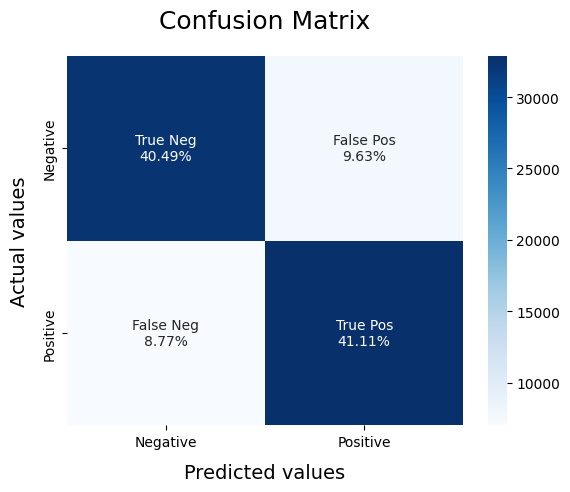

array([4, 4, 4, ..., 4, 0, 0])

In [73]:
SVCmodel=LinearSVC()
SVCmodel.fit(vectoriser.transform(X_train),y_train)
model_Evaluate(SVCmodel,vectoriser.transform(X_test),y_test)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           4       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



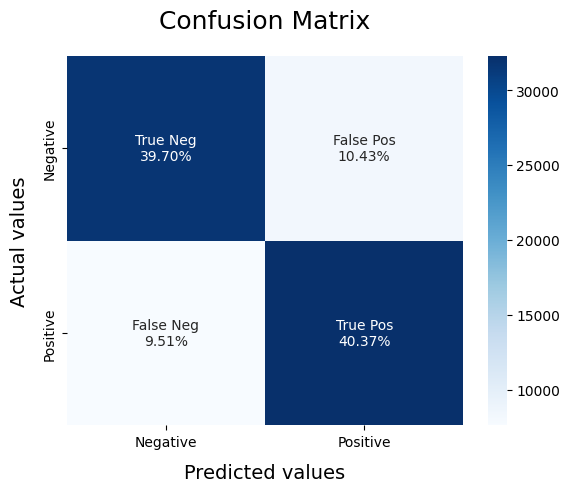

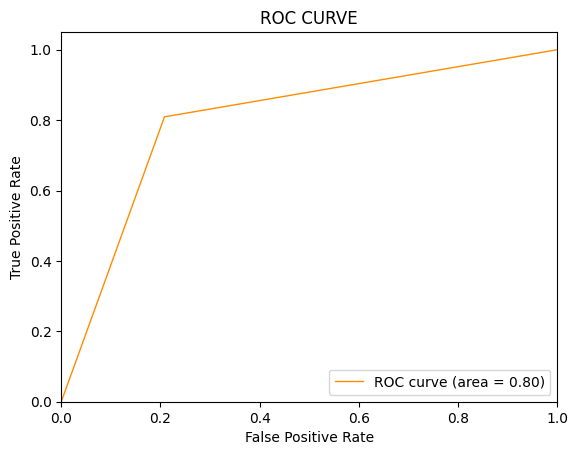

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def model_Evaluate(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Define labels and categories
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    # Calculate percentages for the confusion matrix
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot heatmap
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    # Set labels and title for the plot
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

    # Show plot
    plt.show()

    return y_pred # return y_pred

BNB_model=BernoulliNB(alpha=2)
BNB_model.fit(vectoriser.transform(X_train),y_train)
y_pred = model_Evaluate(BNB_model,vectoriser.transform(X_test),y_test) # assign returned value to y_pred

# Assuming 4 represents the positive class in your dataset
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           4       0.80      0.81      0.81    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



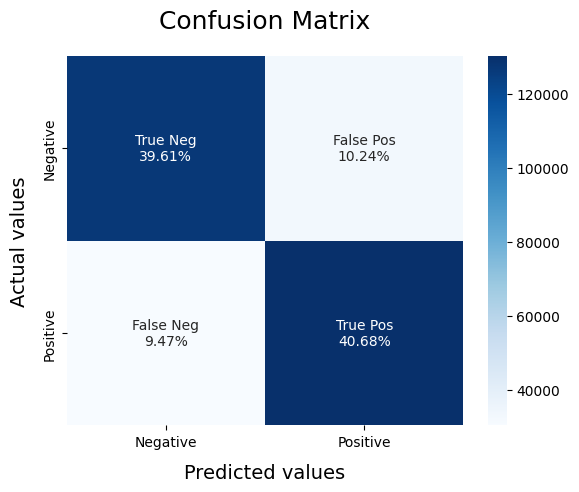

In [90]:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train contains the raw text data of tweets
vectoriser = TfidfVectorizer()  # Initialize a vectorizer
# Assuming X_train is a NumPy array of arrays containing text data
X_train_vec = vectoriser.fit_transform(X_train.ravel()) # Flatten the array to a 1D array of strings

LRmodel=LogisticRegression(C=2,max_iter=1000,n_jobs=-1)
LRmodel.fit(X_train_vec,y_train) # Use the transformed data for training
# Access the inner array in X_test and pass it to the transform method
model_Evaluate(LRmodel,vectoriser.transform(X_test.ravel()),y_test) # Transform X_test using the same vectorizer
# Access the inner array in X_test and pass it to the transform method
y_pred=LRmodel.predict(vectoriser.transform(X_test.ravel())) # Transform X_test before prediction

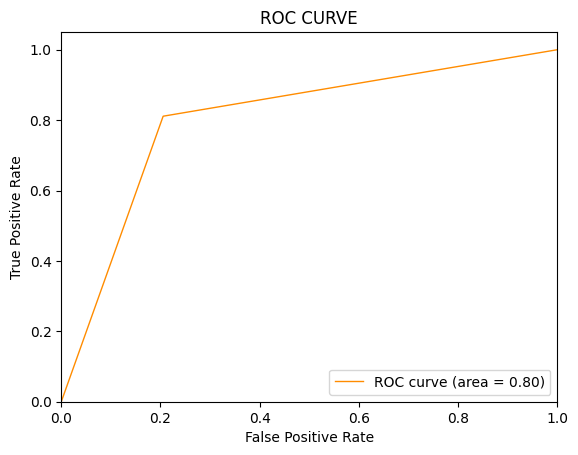

In [94]:
from sklearn.metrics import roc_curve, auc

# Use y_pred instead of y_pred3
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4) # Add pos_label back
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()